# Lab 4
by Yurii Voieividka

## *Use Case 1 - Using Dense layers*

## Load Libraries

In [2]:
from keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np

## Data Preparing

In [ ]:
train_raw = pd.read_csv('./drive/MyDrive/fashion-mnist_train.csv')
train_raw.dropna()
train_x = train_raw[list(train_raw.columns)[1:]].values
train_y = train_raw["label"].values

In [ ]:
train_raw.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_x = train_x / 255.0 

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)


In [ ]:
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

## Creating The Autoencoder Architecture
With Dense layers

In [ ]:
# from keras.models.cloning import Sequential
# from keras.layers.serialization import input_layer
# model = Sequential([
#     Dense(1500, activation='relu', input_shape=(784,)),
#     Dense(1000, activation='relu' ),
#     Dense(500, activation='relu'),
#     Dense(10, activation='sigmoid'),
#     Dense(500, activation='relu'),
#     Dense(1000, activation='relu'),
#     Dense(1500, activation='relu'),
#     Dense(784),
# ])

#input layer
input_layer_0 = Input(shape=(784,))

#encoding architecture
encode_layer_1 = Dense(1500, activation='relu')(input_layer_0)
encode_layer_2 = Dense(1000, activation='relu')(encode_layer_1)
encode_layer_3 = Dense(500, activation='relu')(encode_layer_2)

#latent view
latent_view = Dense(200, activation='sigmoid')(encode_layer_3)

#decoding layer
decoding_layer_1 = Dense(500, activation='relu')(latent_view)
decoding_layer_2 = Dense(1000, activation='relu')(decoding_layer_1)
decoding_layer_3 = Dense(1500, activation='relu')(decoding_layer_2)

#output layer
output_layer = Dense(784,  activation='relu')(decoding_layer_3)

model = Model(input_layer_0, output_layer)



In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 1500)              1177500   
                                                                 
 dense_9 (Dense)             (None, 1000)              1501000   
                                                                 
 dense_10 (Dense)            (None, 500)               500500    
                                                                 
 dense_11 (Dense)            (None, 200)               100200    
                                                                 
 dense_12 (Dense)            (None, 500)               100500    
                                                                 
 dense_13 (Dense)            (None, 1000)              5010

In [ ]:
# model.build(input_shape=(784,))
# model.summary()
model.compile(optimizer='adam',  loss='mse', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
model.fit(train_x, train_x, epochs=20, batch_size=2048, validation_data=(val_x, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 36s 1s/step - loss: 0.1099 - accuracy: 0.0019 - val_loss: 0.0775 - val_accuracy: 0.0018
Epoch 2/20
24/24 [==============================] - 45s 2s/step - loss: 0.0604 - accuracy: 0.0035 - val_loss: 0.0483 - val_accuracy: 0.0034
Epoch 3/20
24/24 [==============================] - 36s 1s/step - loss: 0.0454 - accuracy: 0.0086 - val_loss: 0.0428 - val_accuracy: 0.0077
Epoch 4/20
24/24 [==============================] - 35s 1s/step - loss: 0.0393 - accuracy: 0.0109 - val_loss: 0.0359 - val_accuracy: 0.0087
Epoch 5/20
24/24 [==============================] - 35s 1s/step - loss: 0.0336 - accuracy: 0.0128 - val_loss: 0.0309 - val_accuracy: 0.0124
Epoch 6/20
24/24 [==============================] - 34s 1s/step - loss: 0.0301 - accuracy: 0.0142 - val_loss: 0.0296 - val_accuracy: 0.0148
Epoch 7/20
24/24 [==============================] - 41s 2s/step - loss: 0.0281 - accuracy: 0.0160 - val_loss: 0.0276 - val_accuracy: 0.0129
Epoch 8/20
24/24 [==

In [ ]:
preds = model.predict(val_x)

375/375 [==============================] - 7s 19ms/step


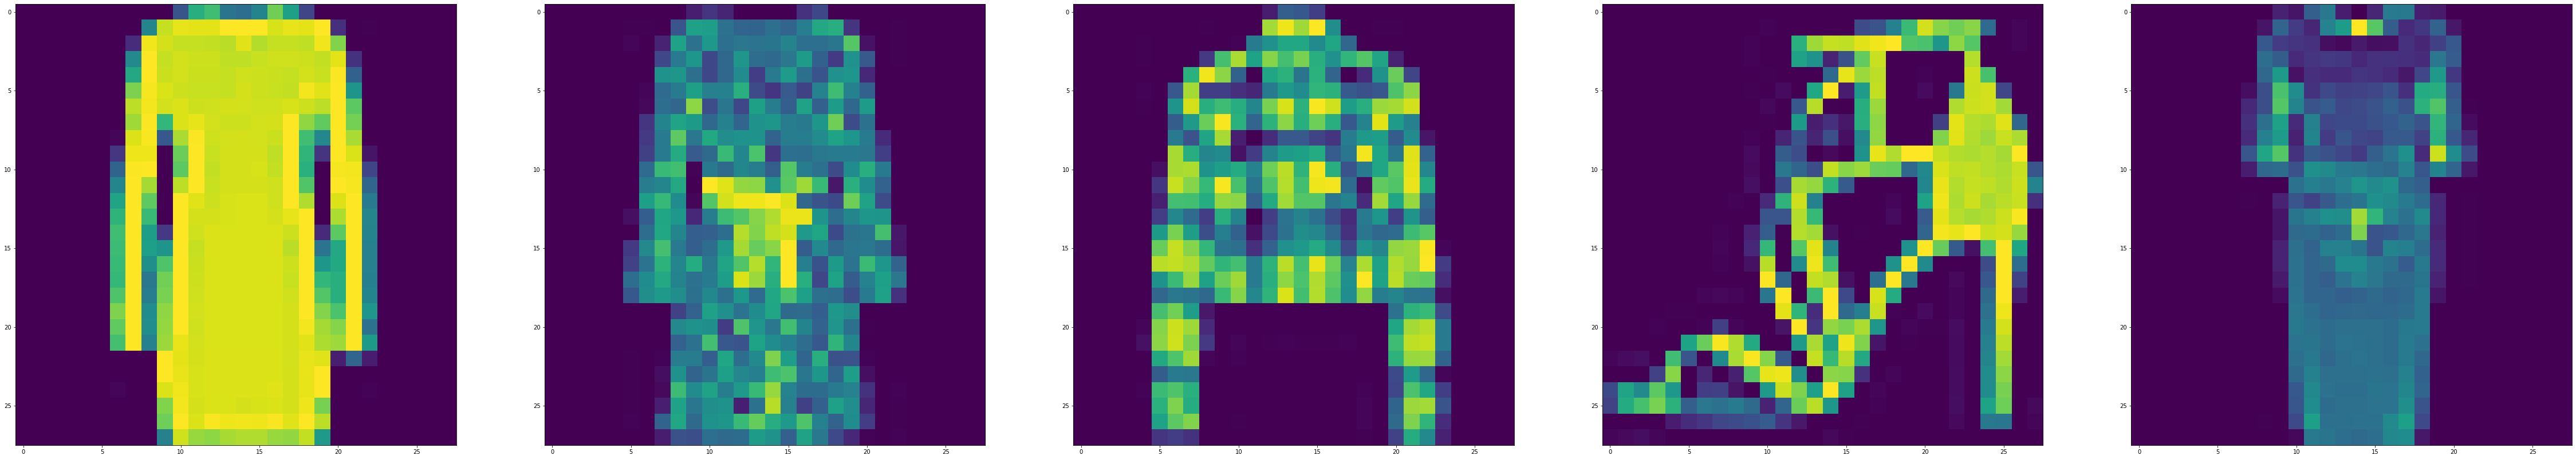

In [ ]:
from PIL import Image
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
 ax[i].imshow(val_x[i].reshape(28, 28))
plt.show()

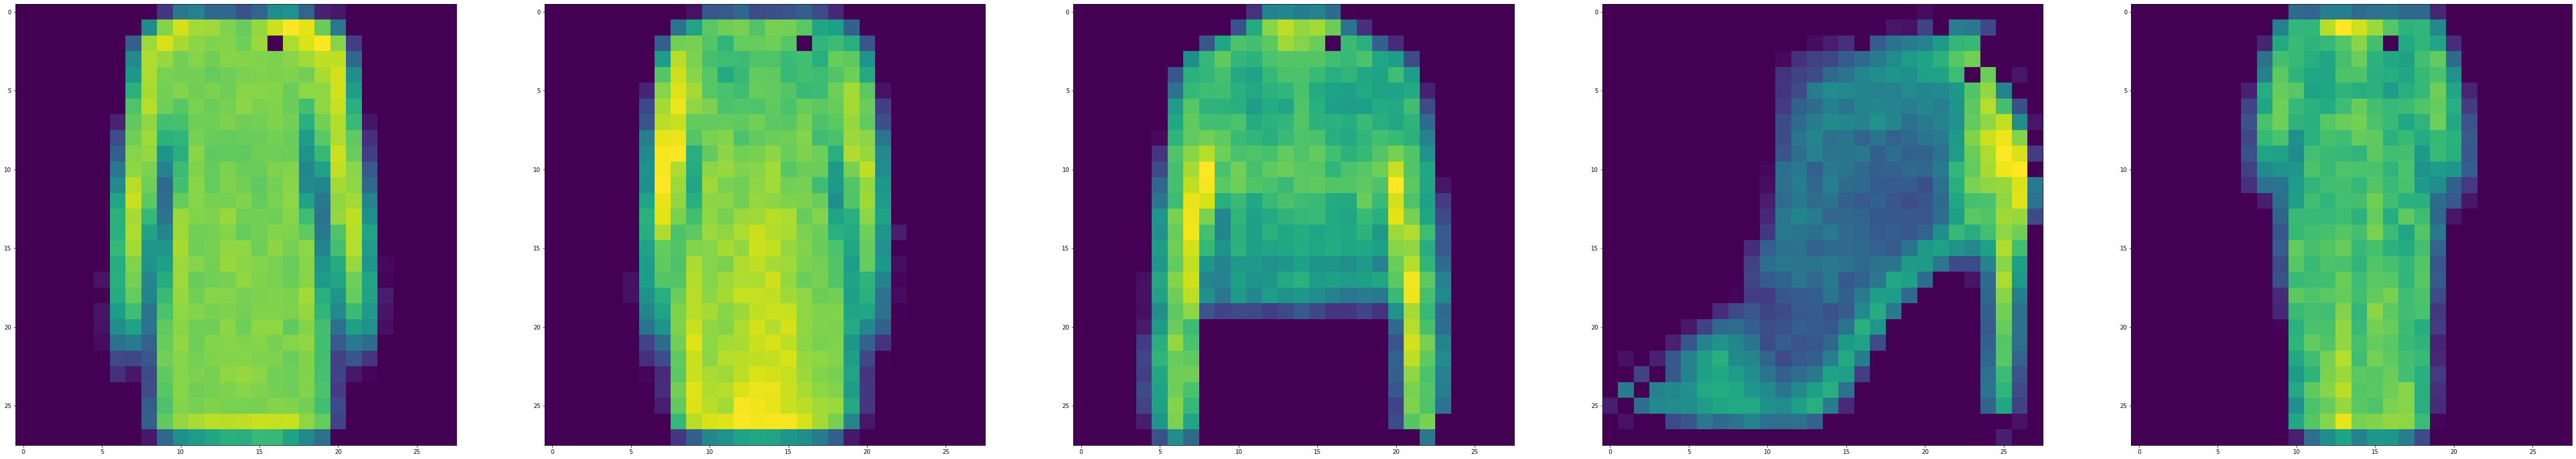

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5):
 ax[i].imshow(preds[i].reshape(28, 28))
plt.show()

## *Using Convolutional Layers - Using convolution layers*


In [ ]:
train_x = train_raw[list(train_raw.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# normilize and reshape
train_x = train_x / 255
val_x = val_x / 255

In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

Add Noise 

In [ ]:
noise = augmenters.SaltAndPepper(0.1)
seq_object = augmenters.Sequential([noise])

train_x_n = seq_object.augment_images(train_x * 255) / 255
val_x_n = seq_object.augment_images(val_x * 255) / 255

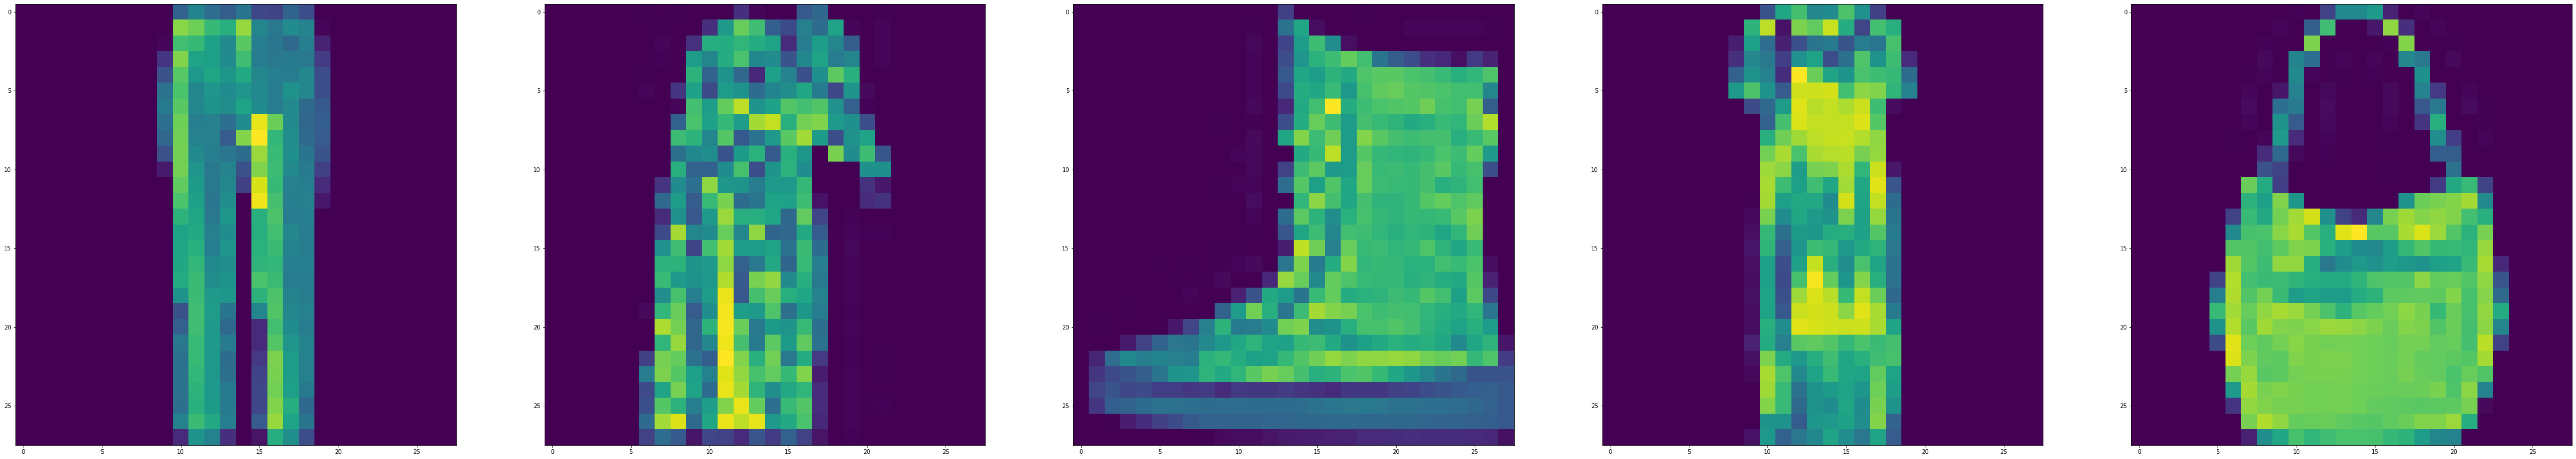

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
 ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

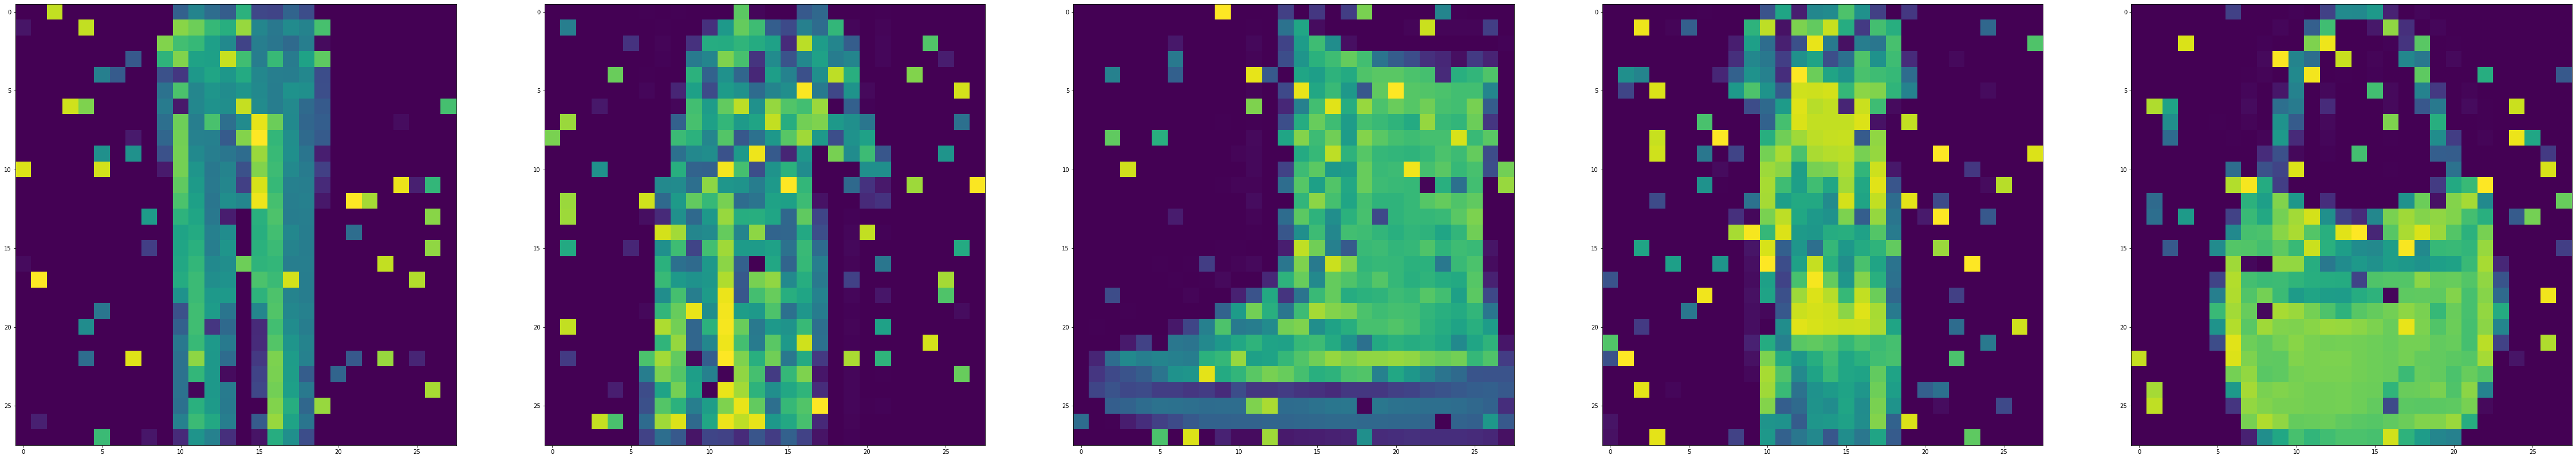

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
 ax[i-5].imshow(train_x_n[i].reshape(28, 28))
plt.show()

In [ ]:
input_layer = Input(shape=(28, 28, 1))

encoded_layer_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer_1 = MaxPool2D((2, 2), padding='same')(encoded_layer_1)
encoded_layer_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer_1)
encoded_layer_2 = MaxPool2D((2, 2), padding='same')(encoded_layer_2)
encoded_layer_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer_2)


latent_view = MaxPool2D((2, 2), padding='same')(encoded_layer_3)

decoding_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoding_layer_1 = UpSampling2D((2, 2))(decoding_layer_1)
decoding_layer_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoding_layer_1)
decoding_layer_2 = UpSampling2D((2, 2))(decoding_layer_2)

decoding_layer_3 = Conv2D(64, (3, 3), activation='relu')(decoding_layer_2)
decoding_layer_3 = UpSampling2D((2, 2))(decoding_layer_3)
output_layer = Conv2D(1, (3, 3), padding='same')(decoding_layer_3)

model_2 = Model(input_layer, output_layer)
model_2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = model_2.fit(train_x_n, train_x, epochs=20, batch_size=2048, validation_data=(val_x_n, val_x), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 252s 10s/step - loss: 0.0923 - accuracy: 0.4878 - val_loss: 0.0570 - val_accuracy: 0.4928
Epoch 2/20
24/24 [==============================] - 257s 11s/step - loss: 0.0462 - accuracy: 0.4995 - val_loss: 0.0392 - val_accuracy: 0.5003
Epoch 3/20
24/24 [==============================] - 254s 11s/step - loss: 0.0355 - accuracy: 0.5016 - val_loss: 0.0329 - val_accuracy: 0.4998
Epoch 4/20
24/24 [==============================] - 251s 10s/step - loss: 0.0307 - accuracy: 0.5021 - val_loss: 0.0289 - val_accuracy: 0.5003
Epoch 5/20
24/24 [==============================] - 251s 10s/step - loss: 0.0272 - accuracy: 0.5031 - val_loss: 0.0260 - val_accuracy: 0.5013
Epoch 6/20
24/24 [==============================] - 264s 11s/step - loss: 0.0251 - accuracy: 0.5040 - val_loss: 0.0243 - val_accuracy: 0.5026
Epoch 7/20
24/24 [==============================] - 253s 10s/step - loss: 0.0235 - accuracy: 0.5047 - val_loss: 0.0233 - val_accuracy: 0.5023
Epoch 

In [ ]:
model_2.save('model_lab4_convolutional_autoencoder.h5')

1/1 [==============================] - 0s 203ms/step


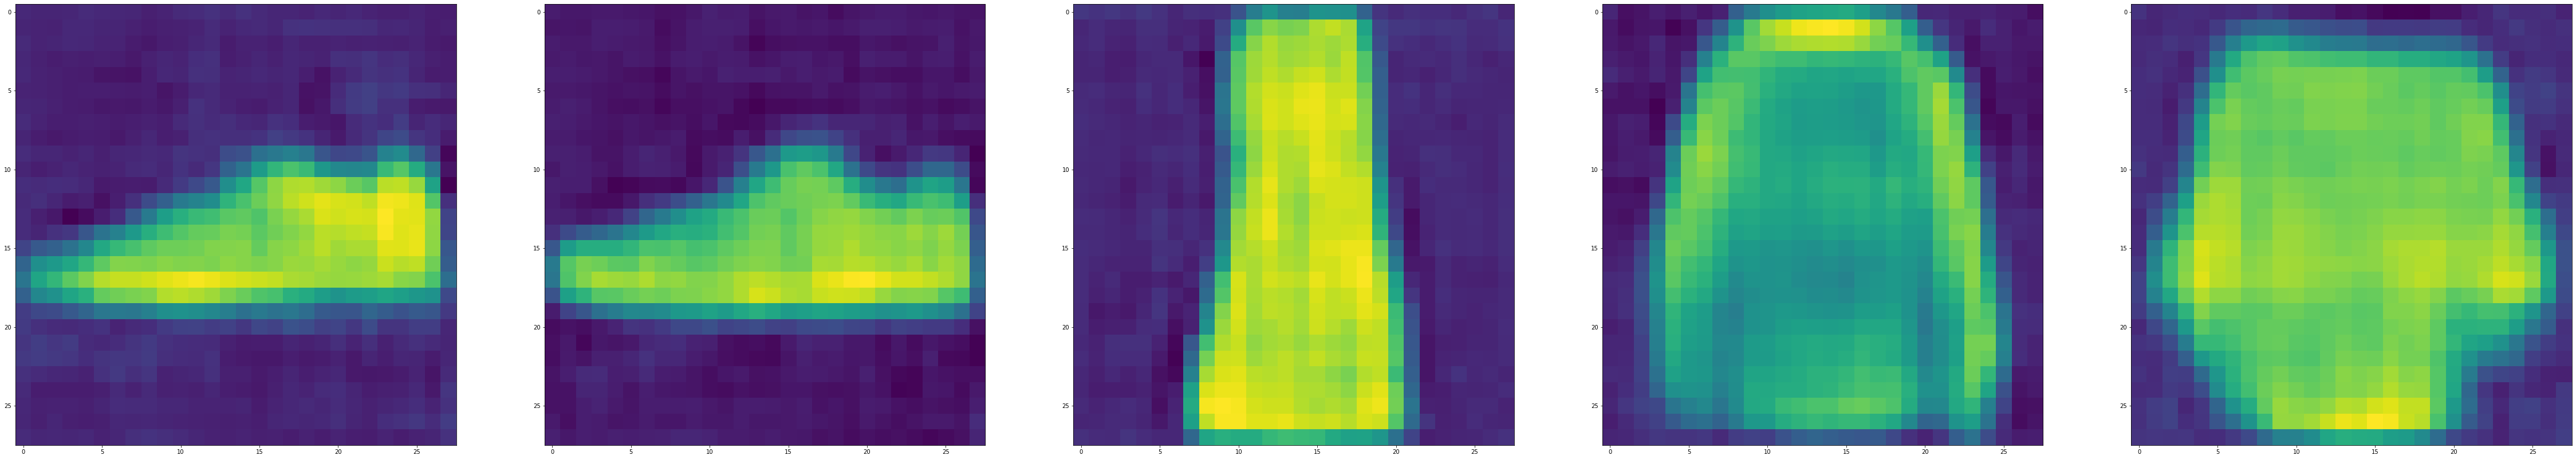

In [ ]:
preds = model_2.predict(val_x_n[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
 ax[i-5].imshow(preds[i].reshape(28, 28))
plt.show()

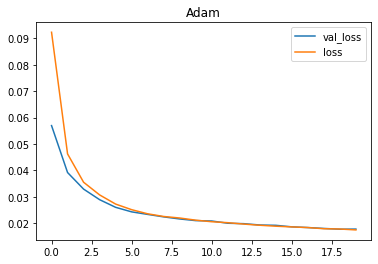

In [ ]:
# print(history[:5])
import pandas as pd
history_df = pd.DataFrame(history.history)
# print(history_df)
history_df.loc[:,['val_loss','loss']].plot(title='Adam')
#history_df.plot()

## Task

let's use different model to see how it will look like

In [7]:
train_raw = pd.read_csv('./drive/MyDrive/fashion-mnist_train.csv')
train_raw.dropna()
train_x = train_raw[list(train_raw.columns)[1:]].values
train_y = train_raw["label"].values

In [8]:
train_x = train_raw[list(train_raw.columns)[1:]].values
train_x, val_x = train_test_split(train_x, test_size=0.2)

# normilize and reshape
train_x_2 = train_x / 255
val_x_2 = val_x / 255

In [9]:
train_x_2 = train_x_2.reshape(-1, 28, 28, 1)
val_x_2 = val_x_2.reshape(-1, 28, 28, 1)

In [10]:
noise = augmenters.CoarseSalt(0.2)

seq_object = augmenters.Sequential([noise])

# train_x_2 = train_x_2.astype(np.uint8)
# val_x_2 = val_x_2.astype(np.uint8)
train_x_n_2 = seq_object.augment_images(train_x_2 * 255) / 255
val_x_n_2 = seq_object.augment_images(val_x_2 * 255) / 255

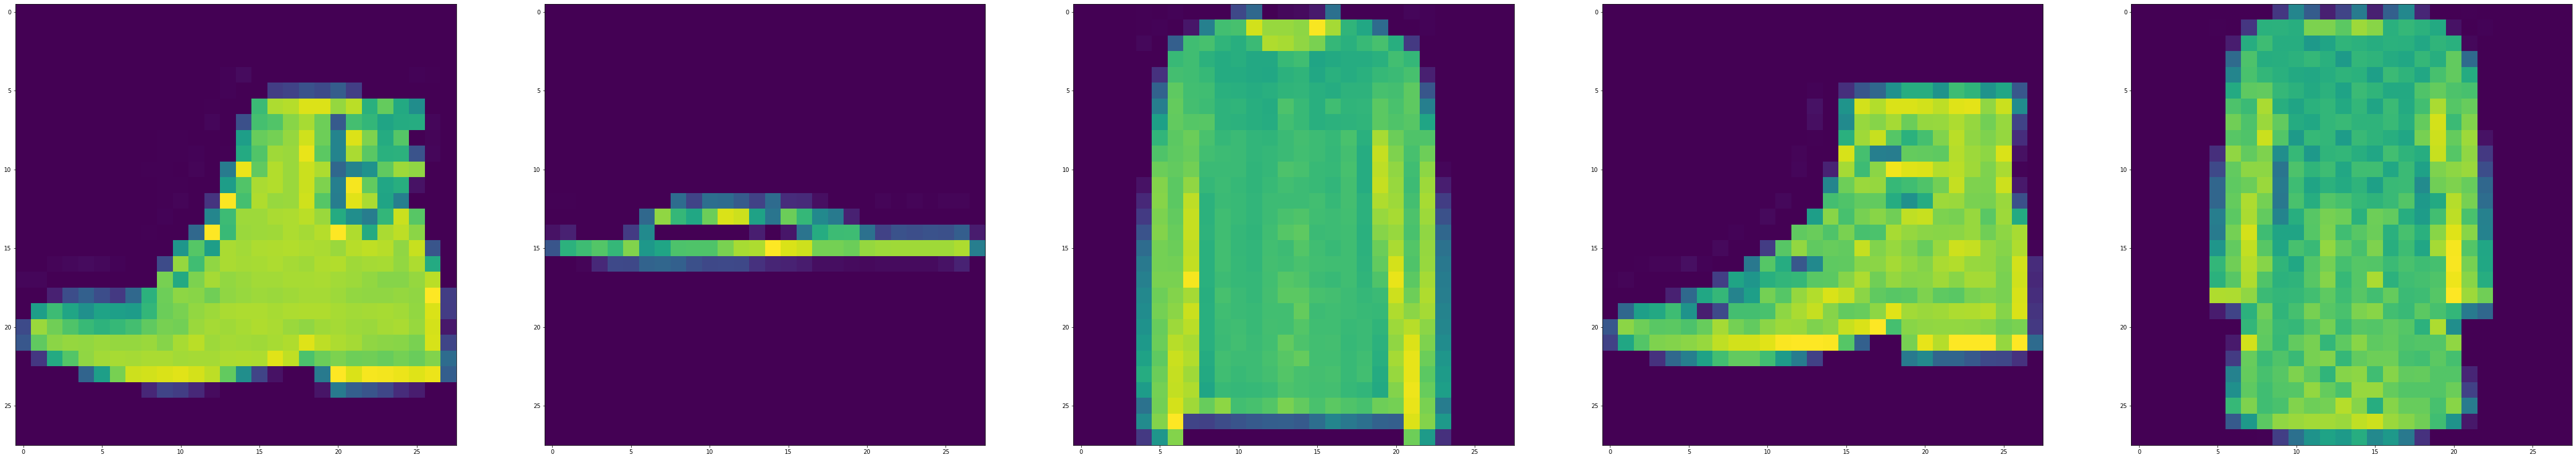

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
 ax[i-5].imshow(train_x[i].reshape(28, 28))
plt.show()

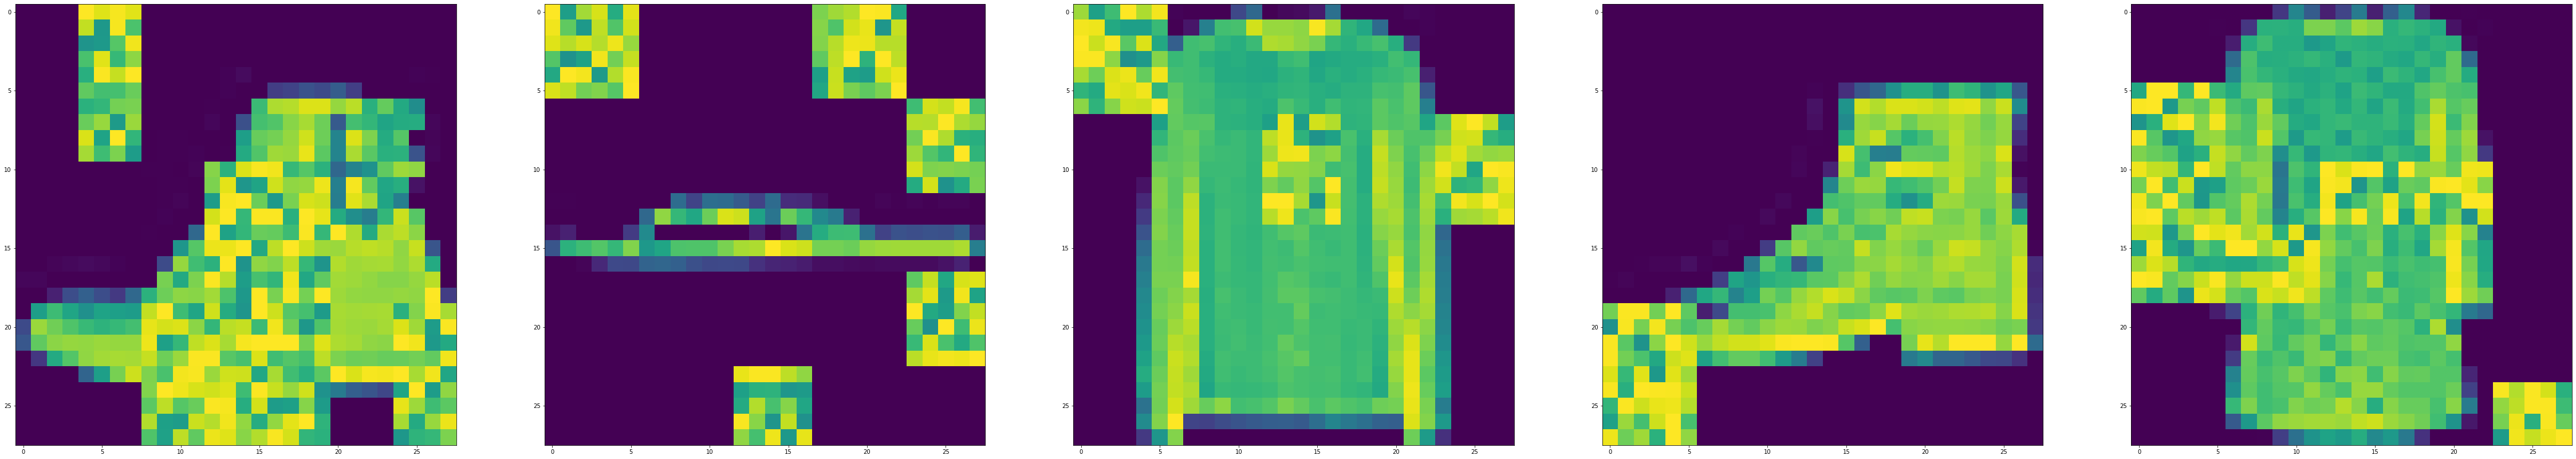

In [ ]:
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
 ax[i-5].imshow(train_x_n_2[i].reshape(28, 28))
plt.show()

In [11]:
# input_layer = Input(shape=(28, 28, 1))

# encoded_layer_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
# encoded_layer_1 = MaxPool2D((2, 2), padding='same')(encoded_layer_1)
# encoded_layer_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer_1)
# encoded_layer_2 = MaxPool2D((2, 2), padding='same')(encoded_layer_2)
# encoded_layer_3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer_2)


# latent_view = MaxPool2D((2, 2), padding='same')(encoded_layer_3)

# decoding_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
# decoding_layer_1 = UpSampling2D((2, 2))(decoding_layer_1)
# decoding_layer_2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoding_layer_1)
# decoding_layer_2 = UpSampling2D((2, 2))(decoding_layer_2)

# decoding_layer_3 = Conv2D(64, (3, 3), activation='relu')(decoding_layer_2)
# decoding_layer_3 = UpSampling2D((2, 2))(decoding_layer_3)
# output_layer = Conv2D(1, (3, 3), padding='same')(decoding_layer_3)

# model_2 = Model(input_layer, output_layer)
# model_2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
from keras.models.cloning import Sequential
from keras.layers import Dropout, Reshape

encoder = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Dropout(0.5),
    MaxPool2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Dropout(0.5),
    MaxPool2D((2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPool2D((2, 2), padding='same')
])

decoder = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), padding='same')
])

input_layer = Input(shape=(28, 28, 1))
latent_vector = encoder(input_layer)
output = decoder(latent_vector)

model_3 = Model(inputs = input_layer, outputs=output)
model_3.compile("nadam", loss="mse")

epochs=30
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')


In [12]:
model_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 sequential (Sequential)     (None, 4, 4, 16)          72224     
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         74529     
                                                                 
Total params: 146,753
Trainable params: 146,753
Non-trainable params: 0
_________________________________________________________________


In [14]:
history_3 = model_3.fit(train_x_n_2, train_x_2, epochs=20, batch_size=2048, validation_data=(val_x_n_2, val_x_2), callbacks=[early_stopping])

Epoch 1/20
24/24 [==============================] - 564s 23s/step - loss: 0.0850 - val_loss: 0.0990
Epoch 2/20
24/24 [==============================] - 532s 22s/step - loss: 0.0666 - val_loss: 0.0823
Epoch 3/20
24/24 [==============================] - 536s 22s/step - loss: 0.0490 - val_loss: 0.0726
Epoch 4/20
24/24 [==============================] - 538s 22s/step - loss: 0.0447 - val_loss: 0.0686
Epoch 5/20
24/24 [==============================] - 538s 22s/step - loss: 0.0418 - val_loss: 0.0658
Epoch 6/20
24/24 [==============================] - 533s 22s/step - loss: 0.0398 - val_loss: 0.0679
Epoch 7/20
24/24 [==============================] - 529s 22s/step - loss: 0.0382 - val_loss: 0.0673
Epoch 8/20
24/24 [==============================] - 530s 22s/step - loss: 0.0372 - val_loss: 0.0638
Epoch 9/20
24/24 [==============================] - 529s 22s/step - loss: 0.0355 - val_loss: 0.0603
Epoch 10/20
 3/24 [==>...........................] - ETA: 7:57 - loss: 0.0346

KeyboardInterrupt: ignored

Use different noises to learn about the model

In [ ]:
model_3.save('model_lab4_convolutional_autoencoder_impulse_noise.h5')

Salt-and-pepper noise, also known as impulse noise, is a form of noise sometimes seen on digital images. This noise can be caused by sharp and sudden disturbances in the image signal. It presents itself as sparsely occurring white and black pixels.


![image](https://www.researchgate.net/publication/220660268/figure/fig3/AS:668976006852624@1536507717428/Deblurring-in-the-presence-of-salt-and-pepper-noise-Left-Source-image-blurred-with-a.ppm)

1/1 [==============================] - 1s 752ms/step


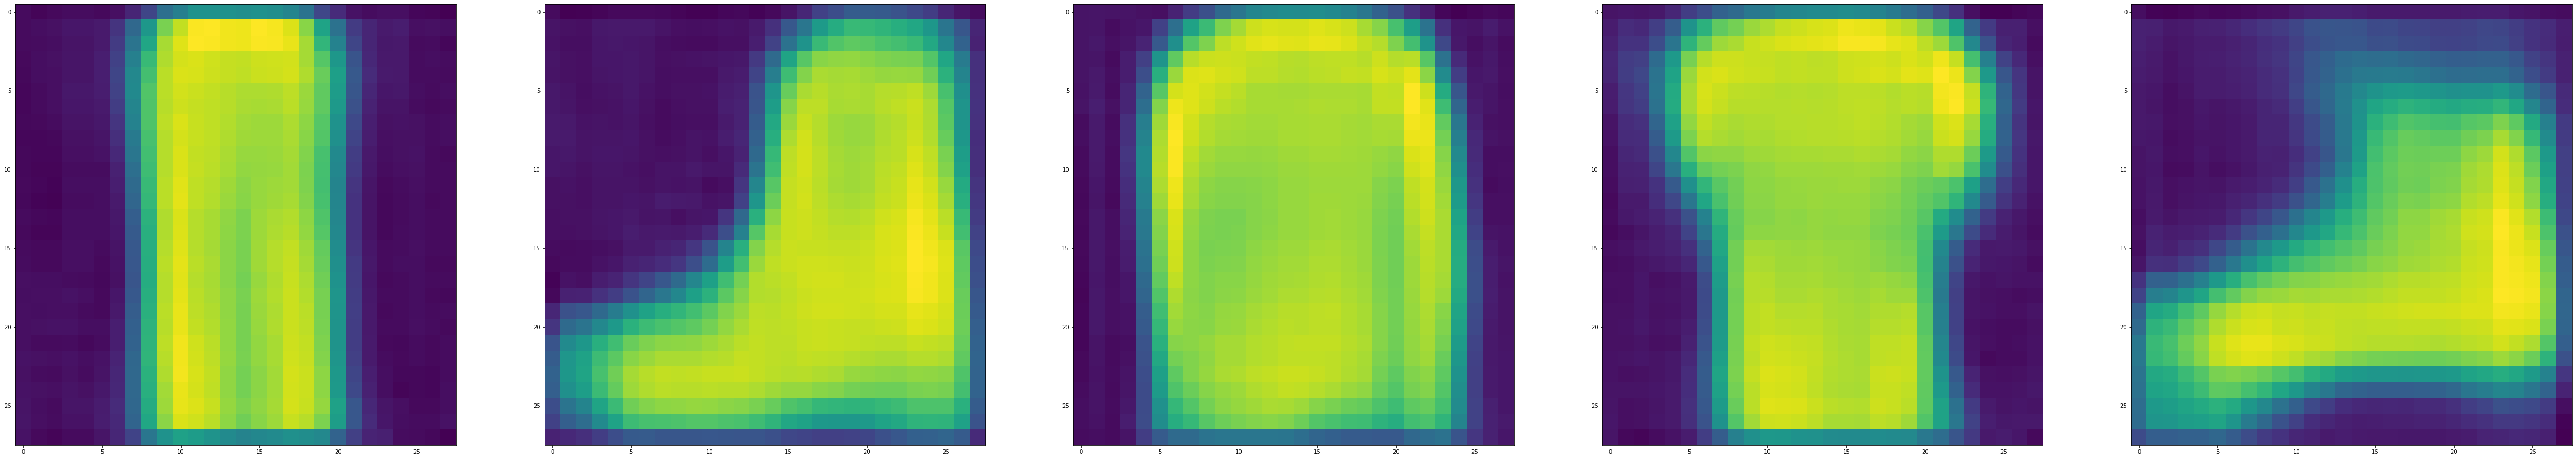

In [16]:
preds_3 = model_3.predict(val_x_n_2[:10])
f, ax = plt.subplots(1,5)
f.set_size_inches(80, 40)
for i in range(5,10):
 ax[i-5].imshow(preds_3[i].reshape(28, 28))
plt.show()